## 1. Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading data and performing basic checks

In [32]:
data = pd.read_csv('archive/Credit_card.csv')
print(data.shape)
data.head(2)

(1548, 18)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


### 2.1 Checking basic numerical stats and info of all columns

In [33]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

## 2.2 Checking missing values in the data

In [35]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [57]:
data['GENDER'].mode()

0    F
dtype: object

In [36]:
data['GENDER'].fillna(data['GENDER'].mode()[0], inplace=True)
data['Annual_income'].fillna(data['Annual_income'].mean(), inplace=True)
data['Birthday_count'].fillna(data['Birthday_count'].mean(), inplace=True)

# dropping rows where Type_Occupation is missing 
data.dropna(subset=['Type_Occupation'], inplace=True)
print(data.shape)

(1060, 18)


In [37]:
# Check for missing values again
missing_values = data.isnull().sum()
missing_values

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

### 2.3 Data sampling 

In [38]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Random Sampling
random_train, random_test = train_test_split(data, test_size=0.2, random_state=42)
print(random_train.shape, random_test.shape)

# Stratified Split using train_test_split
stratified_train, stratified_test = train_test_split(data, test_size=0.2, stratify=data['EDUCATION'], random_state=42)
print(stratified_train.shape, stratified_test.shape)

(848, 18) (212, 18)
(848, 18) (212, 18)


### 2.4 Binning numerical columns

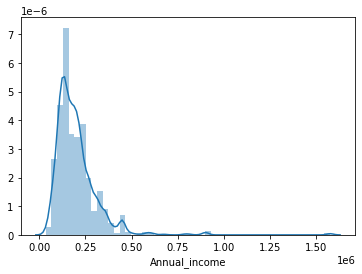

In [39]:
sns.distplot(data['Annual_income'])

In [40]:
# Use qcut to bin the 'Income' column into 4 quantiles with labels
data['Annual_income_quantiles'] = pd.qcut(data['Annual_income'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

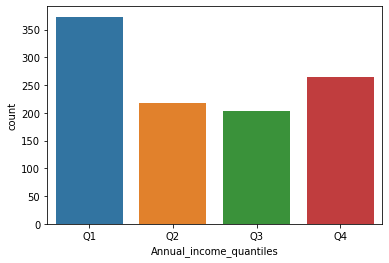

In [41]:
sns.countplot(data['Annual_income_quantiles'])

### 2.5 Encoding categorical variables 

In [49]:
# Use pandas get_dummies to perform one-hot encoding
print(data[['GENDER', 'Car_Owner', 'Propert_Owner']].head())
data_encoded = pd.get_dummies(data, columns=['GENDER', 'Car_Owner', 'Propert_Owner'])
data_encoded.head()

   GENDER Car_Owner Propert_Owner
8       M         Y             Y
9       M         Y             Y
10      M         Y             Y
11      F         Y             Y
12      F         Y             Y


,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,...,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_quantiles,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
8,5010864,1,450000.00000,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,...,1,Core staff,3,Q4,0,1,0,1,0,1
9,5010868,1,450000.00000,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,...,1,Core staff,3,Q4,0,1,0,1,0,1
10,5010869,1,450000.00000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,...,1,Core staff,1,Q4,0,1,0,1,0,1
11,5018498,0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,...,0,Cooking staff,2,Q1,1,0,0,1,0,1
12,5018501,0,191399.32623,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,...,0,Cooking staff,2,Q3,1,0,0,1,0,1


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['EDUCATION'] = label_encoder.fit_transform(data['EDUCATION'])

In [60]:
label_encoder.classes_

array(['Higher education', 'Incomplete higher', 'Lower secondary',
       'Secondary / secondary special'], dtype=object)

In [51]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_quantiles
8,5010864,M,Y,Y,1,450000.00000,Commercial associate,3,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,Q4
9,5010868,M,Y,Y,1,450000.00000,Pensioner,3,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,Q4
10,5010869,M,Y,Y,1,450000.00000,Commercial associate,3,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,Q4
11,5018498,F,Y,Y,0,90000.00000,Working,3,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,Q1
12,5018501,F,Y,Y,0,191399.32623,Working,3,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,Q3


### 2.6 Scaling numerical columns

In [53]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Scale the 'Income' column
data['Annual_income_scaled'] = scaler.fit_transform(data[['Annual_income']])

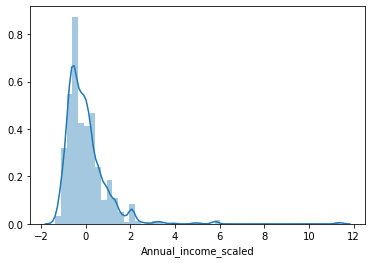

In [54]:
sns.distplot(data['Annual_income_scaled'])

In [62]:
# sns pairplot 
# Plotting distrbution for each numerical column (distplot) and categorical (countplot)
# boxplots 

In [63]:
data_encoded

,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,...,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_quantiles,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
8,5010864,1,450000.00000,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,...,1,Core staff,3,Q4,0,1,0,1,0,1
9,5010868,1,450000.00000,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,...,1,Core staff,3,Q4,0,1,0,1,0,1
10,5010869,1,450000.00000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,...,1,Core staff,1,Q4,0,1,0,1,0,1
11,5018498,0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,...,0,Cooking staff,2,Q1,1,0,0,1,0,1
12,5018501,0,191399.32623,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,...,0,Cooking staff,2,Q3,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,1,360000.00000,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,...,0,Drivers,3,Q4,0,1,0,1,1,0
1543,5028645,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,...,0,Managers,2,Q3,1,0,1,0,0,1
1544,5023655,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,...,0,Accountants,1,Q3,1,0,1,0,1,0
1545,5115992,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,...,0,Managers,4,Q2,0,1,0,1,0,1


In [64]:
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_quantiles,Annual_income_scaled
8,5010864,M,Y,Y,1,450000.00000,Commercial associate,3,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,Q4,2.063826
9,5010868,M,Y,Y,1,450000.00000,Pensioner,3,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,Q4,2.063826
10,5010869,M,Y,Y,1,450000.00000,Commercial associate,3,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,Q4,2.063826
11,5018498,F,Y,Y,0,90000.00000,Working,3,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,Q1,-0.917937
12,5018501,F,Y,Y,0,191399.32623,Working,3,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,Q3,-0.078079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.00000,State servant,3,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,Q4,1.318386
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,0,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,Q3,-0.078079
1544,5023655,F,N,N,0,225000.00000,Commercial associate,1,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,Q3,0.200224
1545,5115992,M,Y,Y,2,180000.00000,Working,0,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,Q2,-0.172496
